# 5. Jupyter Workspace (ALL CODES)

In [1]:
# To ignore unnecessary warrings
import warnings; warnings.simplefilter('ignore')

# To import the packages that will be used.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sps

# To make figures show up
%matplotlib inline

In [2]:
# To define a function to calculate the gamma parameters for gamma distribution
def calculateGammaParams(data):
    mean = np.mean(data)
    std = np.std(data)
    shape = (mean/std)**2
    scale = (std**2)/mean
    return (shape, scale)

>## Load the data

In [3]:
# Load the data

# Age data
df_age = pd.read_csv('age_data_covid19.csv')
# Incubation data
df_incubation = pd.read_csv('incubation_data_covid19.csv')
# Total Number of Cases data
df_cases = pd.read_csv('total_cases_covid19.csv')

>## Age Probability Distribution
>>### Histogram Plots

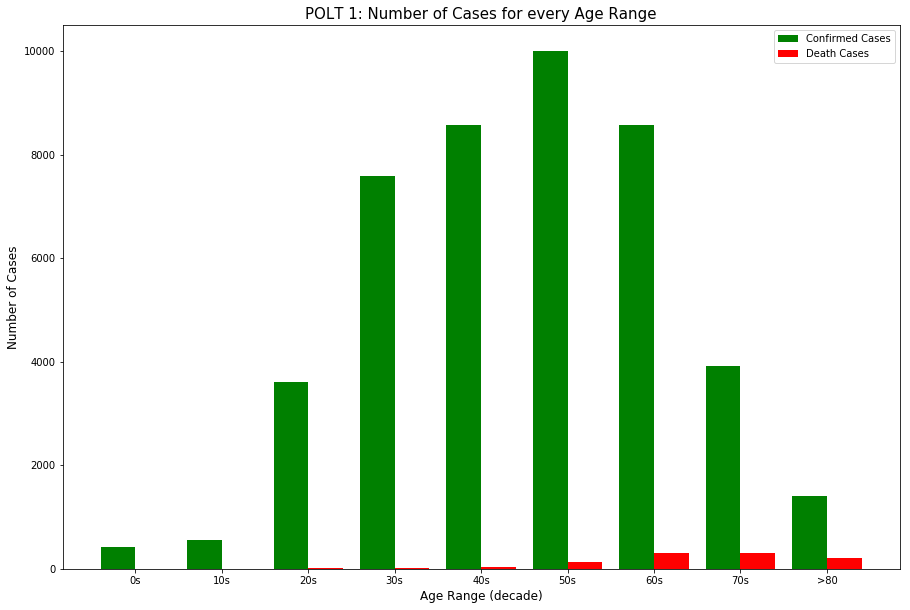

In [4]:
# To make the figure suitable
age_index = np.arange(len(df_age.Age))     # the x locations for the groups
width = 0.4

# To make the plot much bigger to make it clealy visible
plt.figure(figsize=(15,10))

# To plot the age confirmed cases distribution
plt.bar(age_index, df_age.Confirmed_Cases, width, color='g', alpha=1, label='Confirmed Cases')
plt.bar(age_index + width, df_age.Deaths, width, color='r', alpha=1, label = 'Death Cases')

# To put a title on the polt and the axes
plt.title('POLT 1: Number of Cases for every Age Range',{'fontsize': 15, 'fontweight' : 5})
plt.ylabel('Number of Cases',{'fontsize': 12, 'fontweight' : 5})
plt.xlabel('Age Range (decade)',{'fontsize': 12, 'fontweight' : 5})
locations = age_index + width / 2    # xtick locations
labels = ['0s','10s','20s','30s','40s','50s','60s','70s','>80']  # xtick labels
plt.xticks(locations, labels);

# Legend
plt.legend();

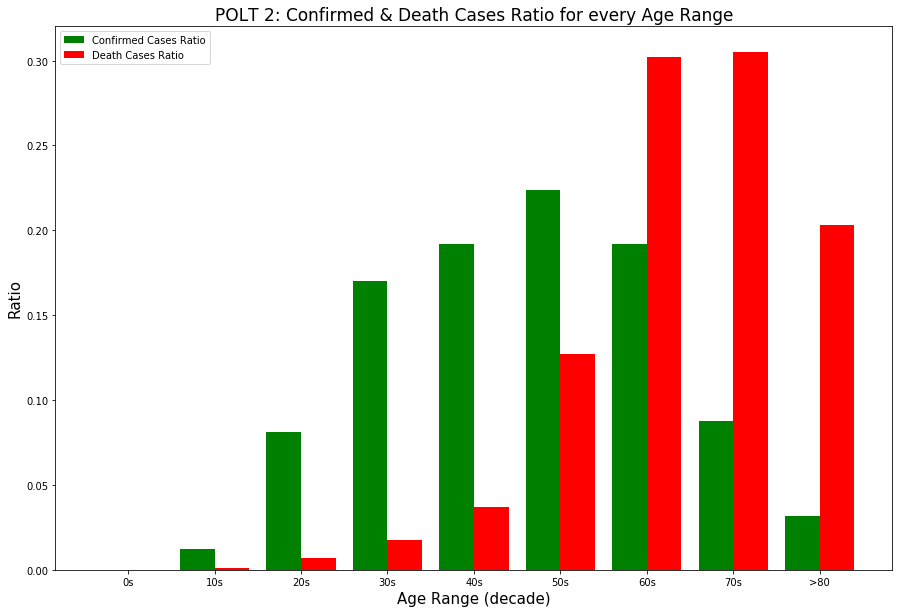

In [5]:
# To make the figure suitable
age_index = np.arange(len(df_age.Age))     # the x locations for the groups
width = 0.4                                # the width of every bar

# To make the plot much bigger to make it clealy visible
plt.figure(figsize=(15,10))

# To plot the age confirmed cases distribution
plt.bar(age_index, df_age.Confirmed_Ratio, width, color='g', alpha=1, label='Confirmed Cases Ratio')
plt.bar(age_index + width, df_age.Deaths_Ratio, width, color='r', alpha=1, label='Death Cases Ratio')

# To put a title on the polt and the axes
plt.title('POLT 2: Confirmed & Death Cases Ratio for every Age Range',{'fontsize': 17})
plt.ylabel('Ratio',{'fontsize': 15, 'fontweight' : 5})
plt.xlabel('Age Range (decade)',{'fontsize': 15, 'fontweight' : 5})
locations = age_index + width / 2    # xtick locations
labels = ['0s','10s','20s','30s','40s','50s','60s','70s','>80']  # xtick labels
plt.xticks(locations, labels);

# legend
plt.legend();

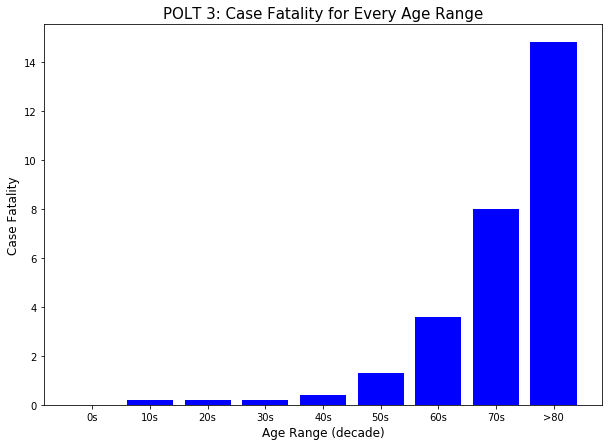

In [6]:
# To make the figure suitable
age_index = np.arange(len(df_age.Age))     # the x locations for the groups

# To make the plot much bigger to make it clealy visible
plt.figure(figsize=(10,7))

# To plot the age death cases distribution
plt.bar(age_index, df_age.Case_Fatality, color='b', alpha=1)

# To put a title on the polt and the axes
plt.title('POLT 3: Case Fatality for Every Age Range', {'fontsize': 15, 'fontweight' : 5})
plt.ylabel('Case Fatality', {'fontsize': 12, 'fontweight' : 5})
plt.xlabel('Age Range (decade)', {'fontsize': 12, 'fontweight' : 5})
locations = age_index    # xtick locations
labels = ['0s','10s','20s','30s','40s','50s','60s','70s','>80']  # xtick labels
plt.xticks(locations, labels);

>>### Normal Probability Distribution Plot


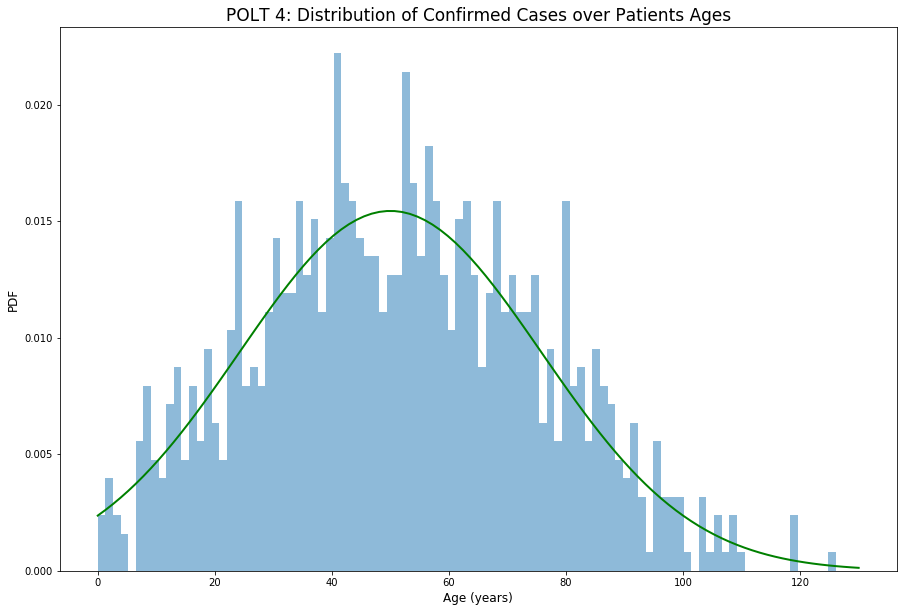

In [7]:
# To make plot much bigger to make it clealy visible
plt.figure(figsize=(15,10))

# To calculate the mean and the standard deviation
mean, std = np.mean(df_age.max_age), np.std(df_age.max_age)

# To gerenate random data with normal probability distribution
normal_random_data = np.random.normal(mean, std, 1000)

# To plot the histogram of the data
count, bins, ignored = plt.hist(normal_random_data, 100, density=True, alpha = 0.5, range=(0,130))

# To calculate the value of PDF based on noraml distribution formula
normal_dis = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (bins - mean)**2 / (2 * std**2))

# To plot the curve of normal distribution of the data
plt.plot(bins, normal_dis, linewidth=2, color='g')

# To put a title on the polt and the axes
plt.title('POLT 4: Distribution of Confirmed Cases over Patients Ages', {'fontsize': 17, 'fontweight' : 5})
plt.ylabel('PDF', {'fontsize': 12, 'fontweight' : 5})
plt.xlabel('Age (years)', {'fontsize': 12, 'fontweight' : 5});

>## Incubation Probability Distribution
>>### Histogram Plot

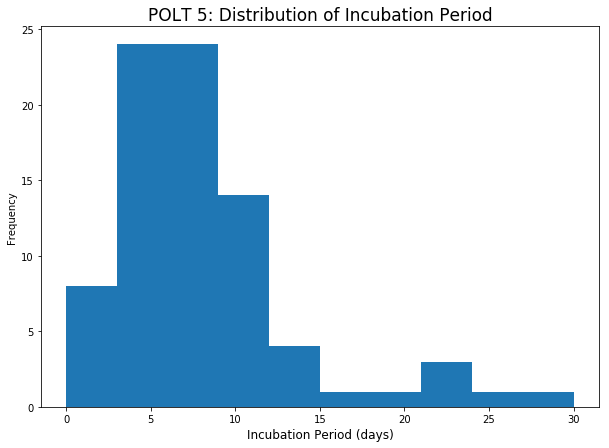

In [8]:
# To make plot much bigger to make it clealy visible
plt.figure(figsize=(10,7))

# To plot the histogram of incubation period
df_incubation.incubation.plot(kind = 'hist')

# To put a title on the polt and the axes
plt.title('POLT 5: Distribution of Incubation Period',{'fontsize': 17, 'fontweight' : 5})
plt.xlabel('Incubation Period (days)', {'fontsize': 12, 'fontweight' : 5});

>>### Gamma Probability Distribution Plot

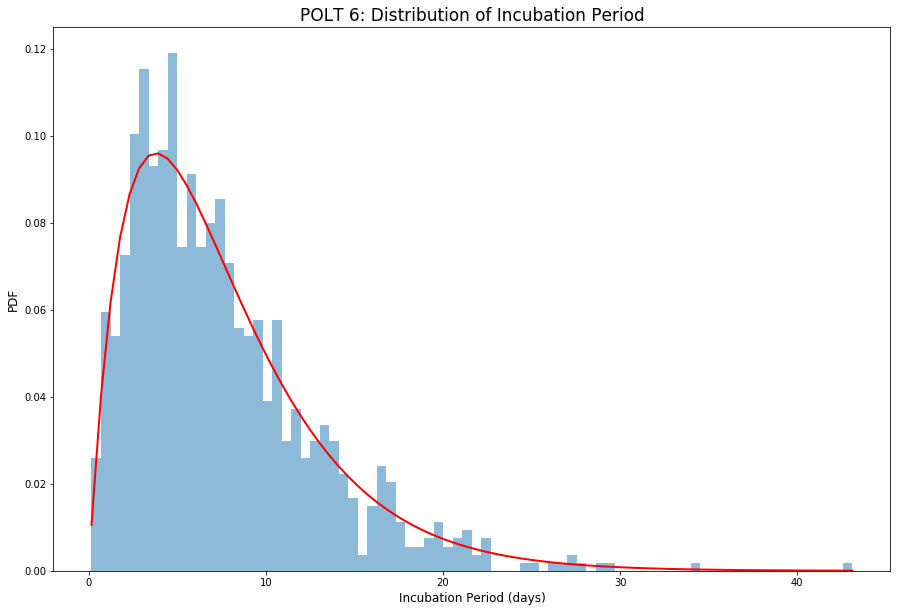

In [9]:
# To make plot much bigger to make it clealy visible
plt.figure(figsize=(15,10))

# To calculate the gamma parameters
shape, scale = calculateGammaParams(df_incubation.incubation)
gamma_random_data = np.random.gamma(shape, scale, 1000)

# To plot the histogram of the incubation period distribution
count, bins, ignored = plt.hist(gamma_random_data, 80, alpha = 0.5, density=True)
gamma_dis = bins**(shape-1)*(np.exp(-bins/scale) / (sps.gamma(shape)*scale**shape))
plt.plot(bins, gamma_dis, linewidth=2, color='r')

# To put a title on the polt and the axes
plt.title('POLT 6: Distribution of Incubation Period', {'fontsize': 17, 'fontweight' : 5})
plt.ylabel('PDF', {'fontsize': 12, 'fontweight' : 5})
plt.xlabel('Incubation Period (days)', {'fontsize': 12, 'fontweight' : 5});

>## Spread of the Virus Probability Distribution

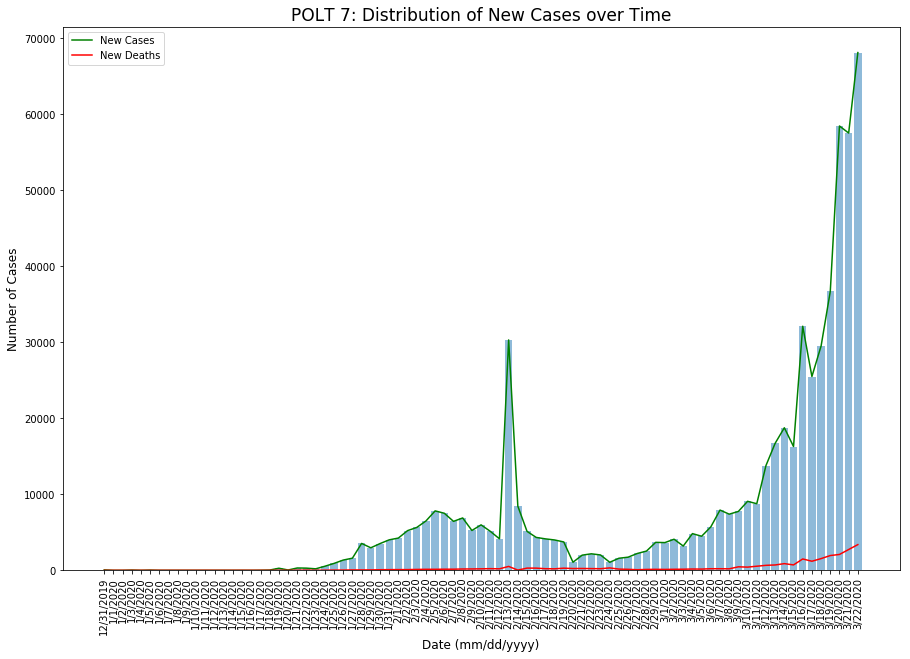

In [10]:
# To make the plot much bigger to make it clealy visible
plt.figure(figsize=(15,10))

# To plot the distribution of cases over time
plt.bar(df_cases.date,df_cases.new_cases,alpha= 0.5)

# To plot the line that  determine the direction of the data distribution over time
plt.plot(df_cases.date,df_cases.new_cases,'g-', label = 'New Cases')
plt.plot(df_cases.date,df_cases.new_deaths,'r-',label = 'New Deaths')

# To make the labels on x axis vertical
plt.xticks(rotation=90);

# To put a title on the polt and the axes
plt.title('POLT 7: Distribution of New Cases over Time', {'fontsize': 17, 'fontweight' : 5})
plt.ylabel('Number of Cases', {'fontsize': 12, 'fontweight' : 5})
plt.xlabel('Date (mm/dd/yyyy)', {'fontsize': 12, 'fontweight' : 5})

#legend
plt.legend();

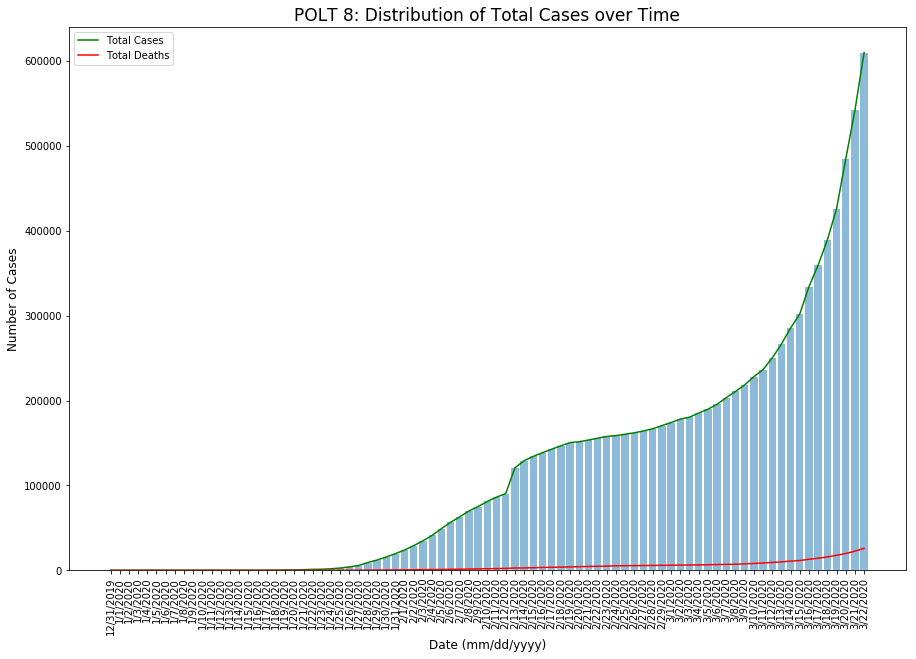

In [11]:
# To make the plot much bigger to make it clealy visible
plt.figure(figsize=(15,10))

# To plot the distribution of cases over time
plt.bar(df_cases.date,df_cases.total_cases,alpha= 0.5)

# To plot the line that  determine the direction of the data distribution over time
plt.plot(df_cases.date,df_cases.total_cases,'g-', label = 'Total Cases')
plt.plot(df_cases.date,df_cases.total_deaths,'r-',label = 'Total Deaths')

# To make the labels on x axis vertical
plt.xticks(rotation=90);

# To put a title on the polt and the axes
plt.title('POLT 8: Distribution of Total Cases over Time', {'fontsize': 17, 'fontweight' : 5})
plt.ylabel('Number of Cases', {'fontsize': 12, 'fontweight' : 5})
plt.xlabel('Date (mm/dd/yyyy)', {'fontsize': 12, 'fontweight' : 5})

#legend
plt.legend();